In [34]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [35]:
def show_img_plt(color_img, title):
    # Convert BGR image to RGB
    img_RGB = color_img[:, :, ::-1]

    plt.imshow(img_RGB)
    plt.title(title)
    plt.axis('off')


def show_hist_plt(hist, title, color):

    plt.title(title)
    plt.xlabel("bins")
    plt.ylabel("number of pixels")
    plt.xlim([0, 256])

    for (h, c) in zip(hist, color):
        plt.plot(h, color=c)


def hist_color_img(img):
    """Calculates the histogram for a three-channel image"""

    histr = []
    #Histogram for the BLUE Channel
    histr.append(cv2.calcHist([img], [0], None, [256], [0, 256]))

    #Histogram for the GREEN Channel
    histr.append(cv2.calcHist([img], [1], None, [256], [0, 256]))

    #Histogram for the RED Channel
    histr.append(cv2.calcHist([img], [2], None, [256], [0, 256]))
    return histr

# Creating the dimensions of the figure and set title:
plt.figure(figsize=(15, 6))
plt.suptitle("Color histograms", fontsize=14, fontweight='bold')


Text(0.5, 0.98, 'Color histograms')

<Figure size 1080x432 with 0 Axes>

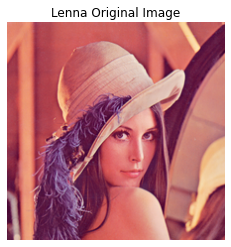

In [36]:
#Loading the original image:
image = cv2.imread("images/lenna.png")
# Show the BGR image:
show_img_plt(image, "Lenna Original Image")

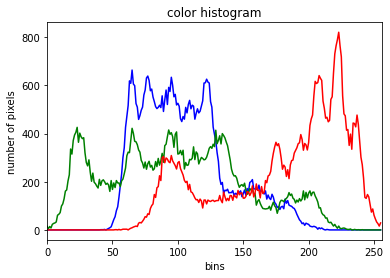

In [37]:
#Calculating the histogram for this BGR image:
hist_color = hist_color_img(image)
# Show the created histogram:
show_hist_plt(hist_color, "color histogram", ['b', 'g', 'r'])


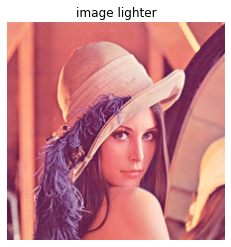

In [38]:
# Add 15 to every pixel on the grayscale image (the result will look lighter) and calculate histogram:
M = np.ones(image.shape, dtype="uint8") * 15
added_image = cv2.add(image, M)
show_img_plt(added_image, "image lighter")

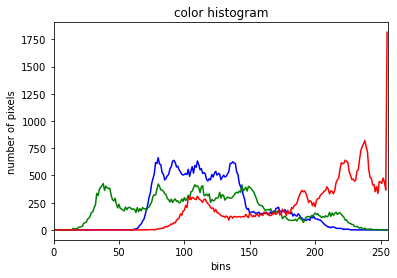

In [39]:
hist_color_added_image = hist_color_img(added_image)
show_hist_plt(hist_color_added_image, "color histogram", ['b', 'g', 'r'])

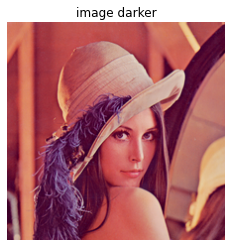

In [40]:
# Subtract 35 from every pixel (the result will look darker) and calculate histogram:
subtracted_image = cv2.subtract(image, M)
show_img_plt(subtracted_image, "image darker")

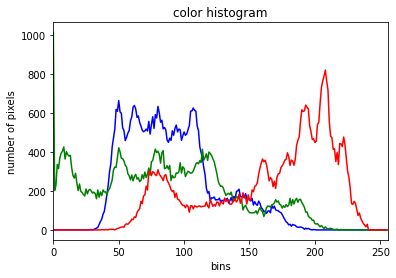

In [41]:
hist_color_subtracted_image = hist_color_img(subtracted_image)
show_hist_plt(hist_color_subtracted_image, "color histogram", ['b', 'g', 'r'])